## Network Analysis: 2-mode Networks  
#### Josh Iden  

Watch: [Presentation](https://youtu.be/J_MztqJV0tQ)

### Assignment
Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:

1. [Brief Description](http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis). Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.  

2. [Dataset](http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat).  

3. Python code to create dataset: https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html

What can you infer about the relationships between (1) the women, and (2) the social events?  


### Data 

One 18×14 matrix, binary. These data were collected by Davis et al in the 1930s. They represent observed attendance at 14 social events by 18 Southern women. The result is a person-by-event matrix: cell (i,j) is 1 if person i attended social event j, and 0 otherwise. 

### Importing and Inspecting Data

In [1]:
import networkx as nx
from networkx.algorithms import bipartite as bi
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
# from https://networkx.org/documentation/stable/auto_examples/algorithms/plot_davis_club.html
G = nx.davis_southern_women_graph()

# check the graph is connected
nx.is_connected(G)

True

In [3]:
# check if the graph is directed or undirected
nx.is_directed(G)

False

In [4]:
# confirm the graph is bipartite
nx.is_bipartite(G)

True

In [5]:
# check the node attributes
G.nodes(data=True)

NodeDataView({'Evelyn Jefferson': {'bipartite': 0}, 'Laura Mandeville': {'bipartite': 0}, 'Theresa Anderson': {'bipartite': 0}, 'Brenda Rogers': {'bipartite': 0}, 'Charlotte McDowd': {'bipartite': 0}, 'Frances Anderson': {'bipartite': 0}, 'Eleanor Nye': {'bipartite': 0}, 'Pearl Oglethorpe': {'bipartite': 0}, 'Ruth DeSand': {'bipartite': 0}, 'Verne Sanderson': {'bipartite': 0}, 'Myra Liddel': {'bipartite': 0}, 'Katherina Rogers': {'bipartite': 0}, 'Sylvia Avondale': {'bipartite': 0}, 'Nora Fayette': {'bipartite': 0}, 'Helen Lloyd': {'bipartite': 0}, 'Dorothy Murchison': {'bipartite': 0}, 'Olivia Carleton': {'bipartite': 0}, 'Flora Price': {'bipartite': 0}, 'E1': {'bipartite': 1}, 'E2': {'bipartite': 1}, 'E3': {'bipartite': 1}, 'E4': {'bipartite': 1}, 'E5': {'bipartite': 1}, 'E6': {'bipartite': 1}, 'E7': {'bipartite': 1}, 'E8': {'bipartite': 1}, 'E9': {'bipartite': 1}, 'E10': {'bipartite': 1}, 'E11': {'bipartite': 1}, 'E12': {'bipartite': 1}, 'E13': {'bipartite': 1}, 'E14': {'bipartite':

We can see the bipartite sets split between women and clubs. 0 = women, 1 = clubs. The provided code didn't work with my version of Networkx but there are several methods provided in the [documentation](https://networkx.org/documentation/stable/reference/algorithms/bipartite.html) that help you split the nodes into sets:

In [6]:
women, clubs = nx.bipartite.sets(G) # women are the top nodes, clubs are the bottom nodes

In [7]:
print('Total Women:',len(women))
print('Total Clubs:',len(clubs))

Total Women: 18
Total Clubs: 14


## Plotting the Bipartite Network

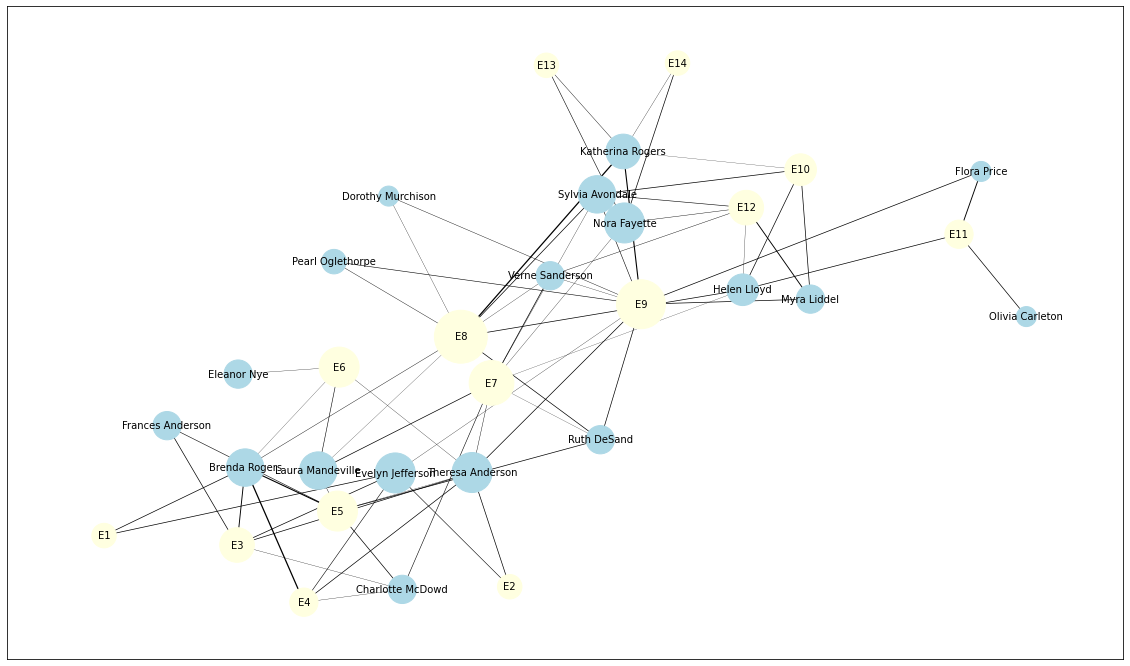

In [8]:
# build a list of colors based on the node type
colors = ['lightyellow' if d['bipartite']==1 else 'lightblue' for n, d in G.nodes(data=True)]
        
# build a list of degrees, adjusting for scale        
degrees=[v*200 for v in dict(G.degree()).values()]

# store a list of weights for edge width to measure strength of connection
edge_weights = [d/4 for n, d in G.degree(weight='weight')]

# plot the graph
plt.figure(figsize=[20,12])
pos = nx.spring_layout(G, seed=648)  # Seed layout for reproducible node positions
nx.draw_networkx(G, pos, width=np.log(edge_weights), with_labels=True, node_size=degrees, node_color=colors, font_size=10)
plt.show()

We can see some strength of relationships but still pretty jumbled. 

### Circular Plot  

A circular plot will give us a better idea of relationships and strength between the women and clubs:

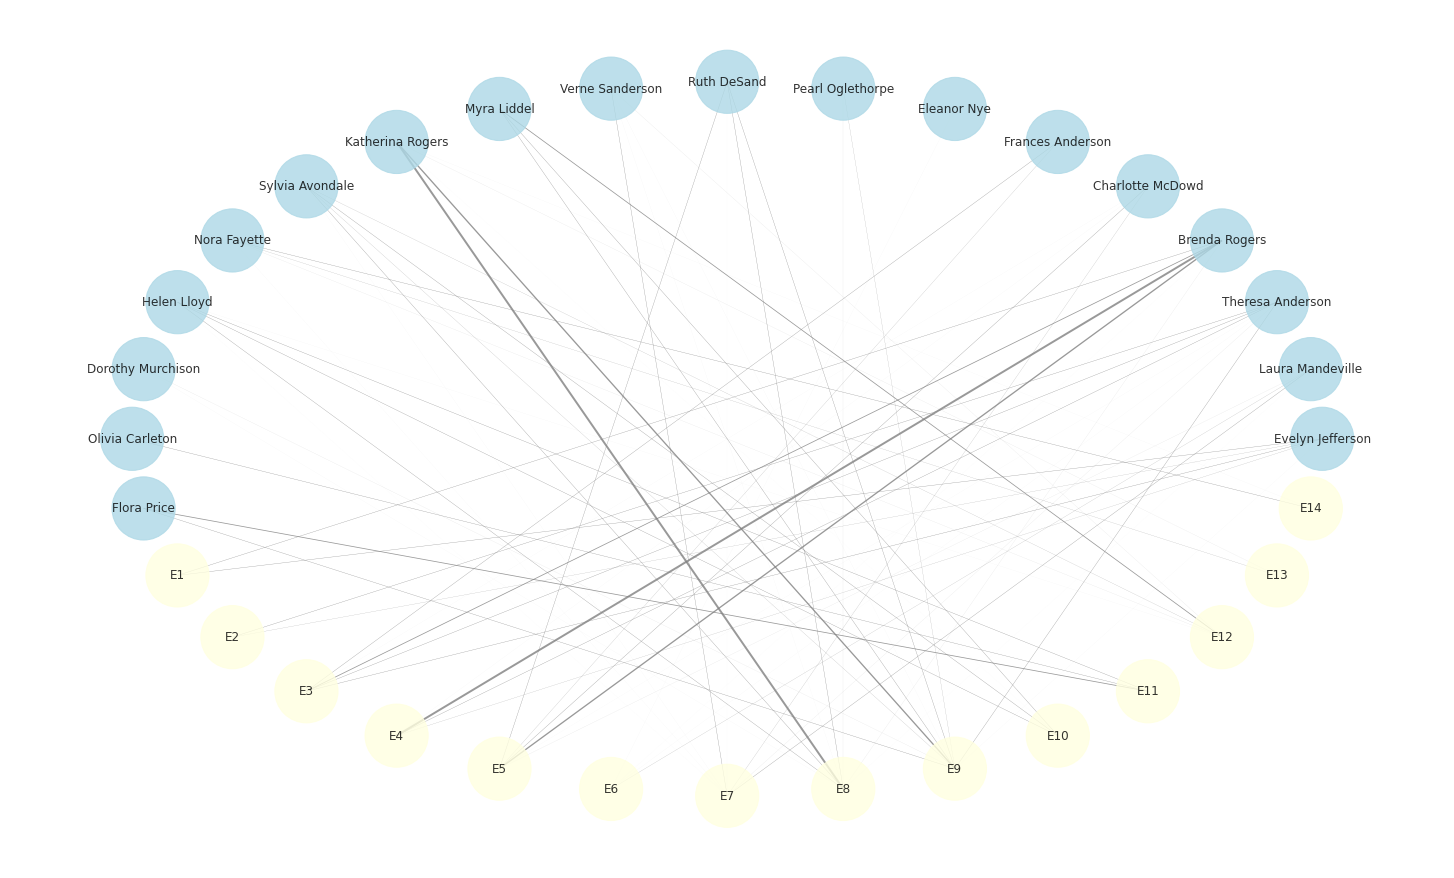

In [9]:
seed=456
plt.figure(figsize=[20,12])
nx.draw_circular(G, width=np.log(edge_weights)**3, edge_color='grey', node_size= 4000, with_labels=True, node_color=colors, alpha=0.8);

Katharina Rogers and Brenda Rogers have the strongest relationships with their clubs, interestingly, Katharina Rogers only belongs to two clubs. We can also see Dorothy Murchison and Eleanor Nye appear to have one very weak membership each. Let's see how the women and clubs relate to one another. 

### Bipartite Projection: Women  

#### Women Degrees 

In [10]:
def graph_summary(graph):
    degree = pd.Series(dict(nx.degree(graph)),name='degree')
    weight = pd.Series(dict(nx.degree(graph, weight='weight')),name='weight')
    closeness = pd.Series(dict(nx.closeness_centrality(graph)),name='closeness_centrality')
    degree_centrality = pd.Series(dict(nx.degree_centrality(graph)),name='degree_centrality')
    betweenness = pd.Series(dict(nx.betweenness_centrality(graph)),name='betweenness_centrality')
    eigen_centrality = pd.Series(dict(nx.eigenvector_centrality(graph)),name='eigenvector_centrality')
    
    return pd.concat([degree, weight, closeness, degree_centrality, betweenness, eigen_centrality], axis=1).sort_values(by='degree', ascending=False).reset_index().rename(columns={"index":"node"})

# using Pandas series
W = bi.weighted_projected_graph(G, women)
w_df = graph_summary(W)
w_df.rename({'node':'member'}, axis=1, inplace=True)
print(w_df[['member','degree']].to_string(index=False))

           member  degree
 Theresa Anderson      17
     Nora Fayette      17
      Helen Lloyd      17
  Sylvia Avondale      17
      Ruth DeSand      17
 Evelyn Jefferson      17
  Verne Sanderson      17
      Myra Liddel      16
Dorothy Murchison      16
 Pearl Oglethorpe      16
 Katherina Rogers      16
 Frances Anderson      15
      Eleanor Nye      15
    Brenda Rogers      15
 Laura Mandeville      15
  Olivia Carleton      12
      Flora Price      12
 Charlotte McDowd      11


#### Women Weights

In [11]:
print(w_df[['member','weight']].sort_values(by='weight',ascending=False).to_string(index=False))

           member  weight
 Theresa Anderson      57
 Evelyn Jefferson      50
    Brenda Rogers      46
  Sylvia Avondale      46
 Laura Mandeville      45
     Nora Fayette      43
      Ruth DeSand      40
  Verne Sanderson      38
 Katherina Rogers      37
      Eleanor Nye      36
      Helen Lloyd      34
      Myra Liddel      33
 Frances Anderson      32
 Pearl Oglethorpe      31
Dorothy Murchison      24
 Charlotte McDowd      24
  Olivia Carleton      14
      Flora Price      14


When we look at just the degrees, most of the women have equal values, between 15-17. However, when we look at the weights, we see a wider distribution, indicating which women have more total connections. 

### Plotting the Bipartite Projection: Women

In [12]:
# build a list of the degrees for node size
degs = [v*400 for v in dict(W.degree()).values()]

# build a list of the weights for edge color
edge_weights = [d['weight'] for n, e, d in W.edges(data=True)]

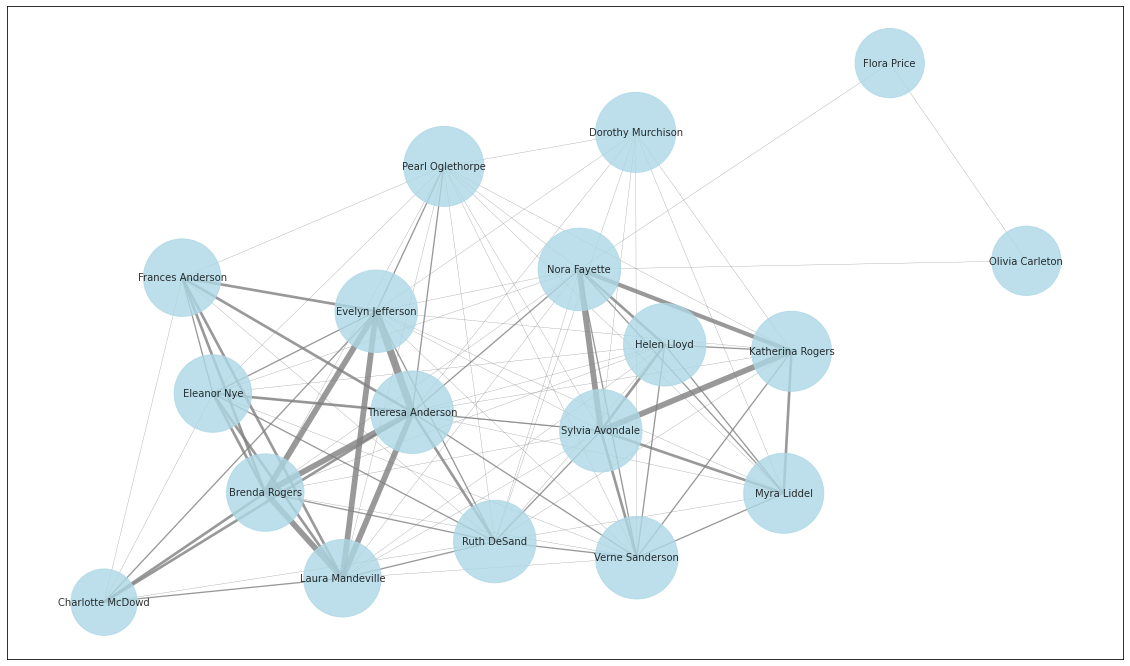

In [13]:
# plot the graph
plt.figure(figsize=[20,12])
pos = nx.spring_layout(W, seed=123)  # Seed layout for reproducible node positions
nx.draw_networkx(W, pos, with_labels=True, node_size=degs, node_color="lightblue", width=np.log(edge_weights)**3, edge_color='grey', font_size=10, alpha=0.8)
plt.show()

We can kind of see a couple cliques around Laura Mandeville and Nora Fayette, but a circle plot might be better to look at. 

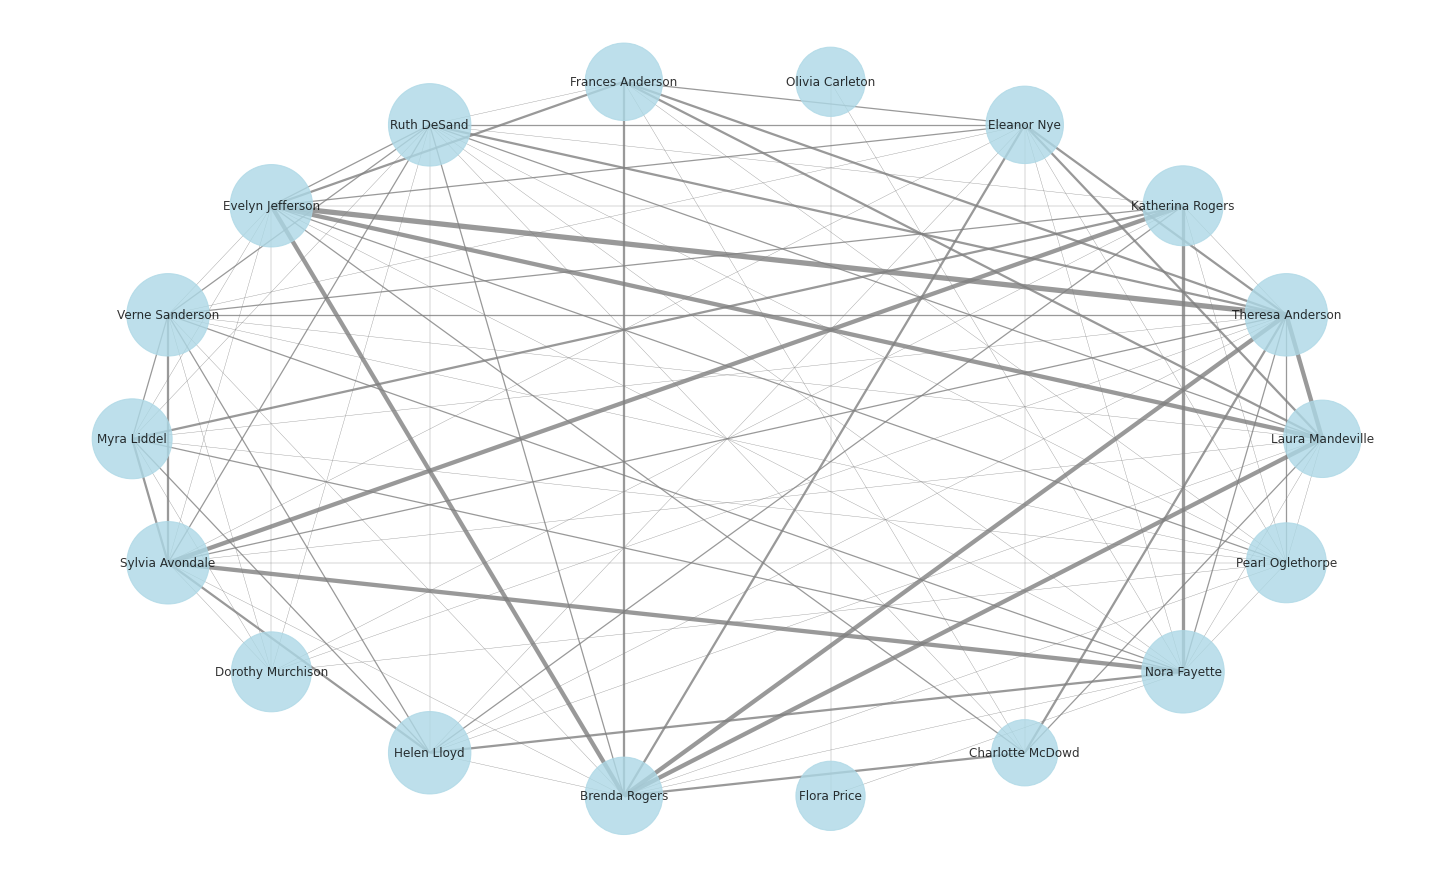

In [14]:
seed=456
plt.figure(figsize=[20,12])
nx.draw_circular(W, width=np.log(edge_weights)**2.5, edge_color='grey', with_labels=True, node_size=degs, node_color='lightblue', alpha=0.8);

This gives us kind of a better sense that there are a couple cliques and boundary spanners, but it's still not clear. 

### Implement the Island Method to View Subgroups

In [15]:
def trim_edges(g, weight=1):
    """
    Takes a graph, and applies a threshold (“water level”), 
    letting all edges above a certain value through, and removing all others. 
    
    It returns a copy of the original graph, so it’s non-destructive
    """
    g2 = nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f, to, **edata)
    
    return g2

def island_method(g, iterations=5):
    weights = [edata['weight'] for f, to, edata in g.edges(data=True)]
    mn = int(min(weights))
    mx = int(max(weights))
    # compute the size of the step, so we get a reasonable step in iterations
    step = int((mx-mn)/iterations)
    
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

In [16]:
# convert generator of connected components to a list 
subgraphs = list(nx.connected_components(W))
cc = subgraphs[0]

# create the induced subgraph of the component
islands = island_method(W.subgraph(cc))

for i in islands:
    # print the threshold level, size of the graph, and number of connected components
    print (i[0], len(i[1]), len(list(nx.connected_components(i[1]))))

1 18 1
2 15 1
3 14 2
4 7 2
5 7 2
6 2 1


We can see there's a clear threshold between 2 and 7, so we'll set the "water level" for the island method to 3. 

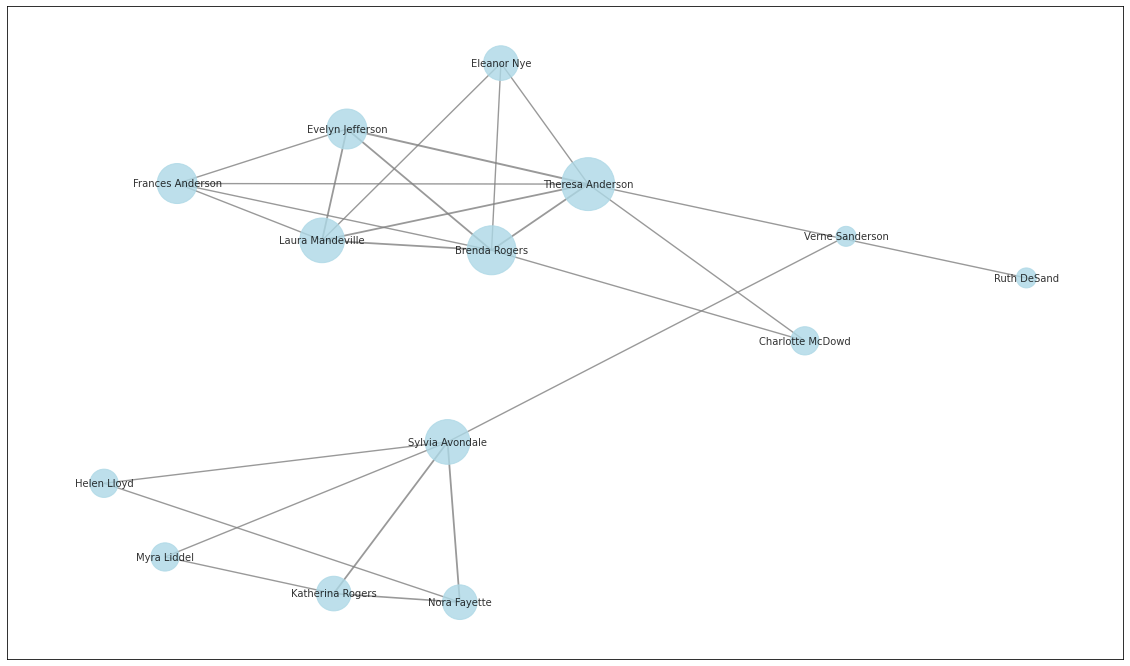

In [17]:
# plotting the graphs, setting water level to 3
plt.figure(figsize=[20,12])

w_trim = trim_edges(W, 3)
pos = nx.spring_layout(w_trim, k=2, seed=234)
w_weights = [d['weight'] for n, e, d in w_trim.edges(data=True)] 
degs_trim = [v*400 for v in dict(w_trim.degree()).values()]
#ns = [v]
nx.draw_networkx(w_trim, pos, width= np.log(w_weights), edge_color='grey', node_size=degs_trim, with_labels=True, node_color='lightblue', alpha=.8, font_size=10);

We can see that there are some cliques:

In [18]:
cliques = list(nx.find_cliques(w_trim))
[print(c) for c in cliques];

['Theresa Anderson', 'Ruth DeSand']
['Theresa Anderson', 'Brenda Rogers', 'Laura Mandeville', 'Evelyn Jefferson', 'Frances Anderson']
['Theresa Anderson', 'Brenda Rogers', 'Laura Mandeville', 'Eleanor Nye']
['Theresa Anderson', 'Brenda Rogers', 'Charlotte McDowd']
['Katherina Rogers', 'Sylvia Avondale', 'Myra Liddel']
['Katherina Rogers', 'Sylvia Avondale', 'Nora Fayette']
['Verne Sanderson', 'Sylvia Avondale']
['Sylvia Avondale', 'Helen Lloyd', 'Nora Fayette']


Let's look at the links by group:

In [19]:
s1 = list(nx.connected_components(w_trim))[0]
s2 = list(nx.connected_components(w_trim))[1]
sub1 = {k: v for k, v in (dict(w_trim.degree(weight = 'weight'))).items() if k in s1}
sub2 = {k: v for k, v in (dict(w_trim.degree(weight = 'weight'))).items() if k in s2}
    
group1 = pd.Series(sub1, name="links").sort_values(ascending=False).reset_index().rename(columns={"index":"member"})
group2 = pd.Series(sub2, name="links").sort_values(ascending=False).reset_index().rename(columns={"index":"member"})
        
excluded = [node for node in list(W.nodes()) if node not in list(w_trim)]

In [20]:
print("Group 1")
print("-"*len("Group 1"))
display(group1)

Group 1
-------


,member,links
0,Theresa Anderson,35
1,Brenda Rogers,30
2,Laura Mandeville,26
3,Evelyn Jefferson,23
4,Frances Anderson,16
5,Eleanor Nye,12
6,Charlotte McDowd,8
7,Ruth DeSand,4


In [21]:
print("Group 2")
print("-"*len("Group 2"))
display(group2)

Group 2
-------


,member,links
0,Sylvia Avondale,24
1,Katherina Rogers,15
2,Nora Fayette,15
3,Myra Liddel,8
4,Helen Lloyd,8
5,Verne Sanderson,4


We can see the most connected members here are Theresa Anderson, Brenda Rogers, Laura Mandeville, and Sylvia Avondale. Let's take a look at the members who fell below the threshold of edges:

In [22]:
print("Below Threshold")
print("-"*len("Below Threshold"))
[print(m) for m in excluded];

Below Threshold
---------------
Olivia Carleton
Dorothy Murchison
Flora Price
Pearl Oglethorpe


These members are the least connected. We can also take a look betweenness centrality to see if there are any possible boundary spanners: 

In [23]:
### This function returns a sorted degree list -- useful for celebrity-spotting
def sorted_map(map):
    return sorted(map.items(), key=lambda item: item[1], reverse=True)

In [24]:
print(w_df[['member','betweenness_centrality']].sort_values(by='betweenness_centrality', ascending=False).to_string(index=False))

           member  betweenness_centrality
 Theresa Anderson                0.010122
     Nora Fayette                0.010122
      Helen Lloyd                0.010122
  Sylvia Avondale                0.010122
      Ruth DeSand                0.010122
 Evelyn Jefferson                0.010122
  Verne Sanderson                0.010122
 Katherina Rogers                0.005348
 Pearl Oglethorpe                0.005348
Dorothy Murchison                0.005348
      Myra Liddel                0.005348
 Frances Anderson                0.002674
      Eleanor Nye                0.002674
    Brenda Rogers                0.002674
 Laura Mandeville                0.002674
  Olivia Carleton                0.000000
      Flora Price                0.000000
 Charlotte McDowd                0.000000


We can see all the members of the cliques have the highest betweenness centrality. These are our boundary spanners. 

### Bipartite Projection: Clubs

#### Club Degrees

In [25]:
# using Pandas series
C = bi.weighted_projected_graph(G, clubs)
c_df = graph_summary(C)
c_df.rename({'node':'club'}, axis=1, inplace=True)
print(c_df[['club','degree']].to_string(index=False))

club  degree
  E7      13
  E8      13
  E6      13
  E9      13
  E5       8
  E1       8
  E4       8
  E3       8
 E13       8
 E14       8
 E11       8
  E2       8
 E12       8
 E10       8


#### Club Weights

In [26]:
print(c_df[['club','weight']].sort_values(by='weight', ascending=False).to_string(index=False))

club  weight
  E8      59
  E7      48
  E9      46
  E6      41
  E5      38
  E3      32
 E12      28
 E10      25
  E4      23
  E2      20
  E1      19
 E13      18
 E14      18
 E11      13


Unlike with the members, for the clubs here we actually see the nodes with the highest degrees also have the most shared contacts.

## Plotting the Club subgraph

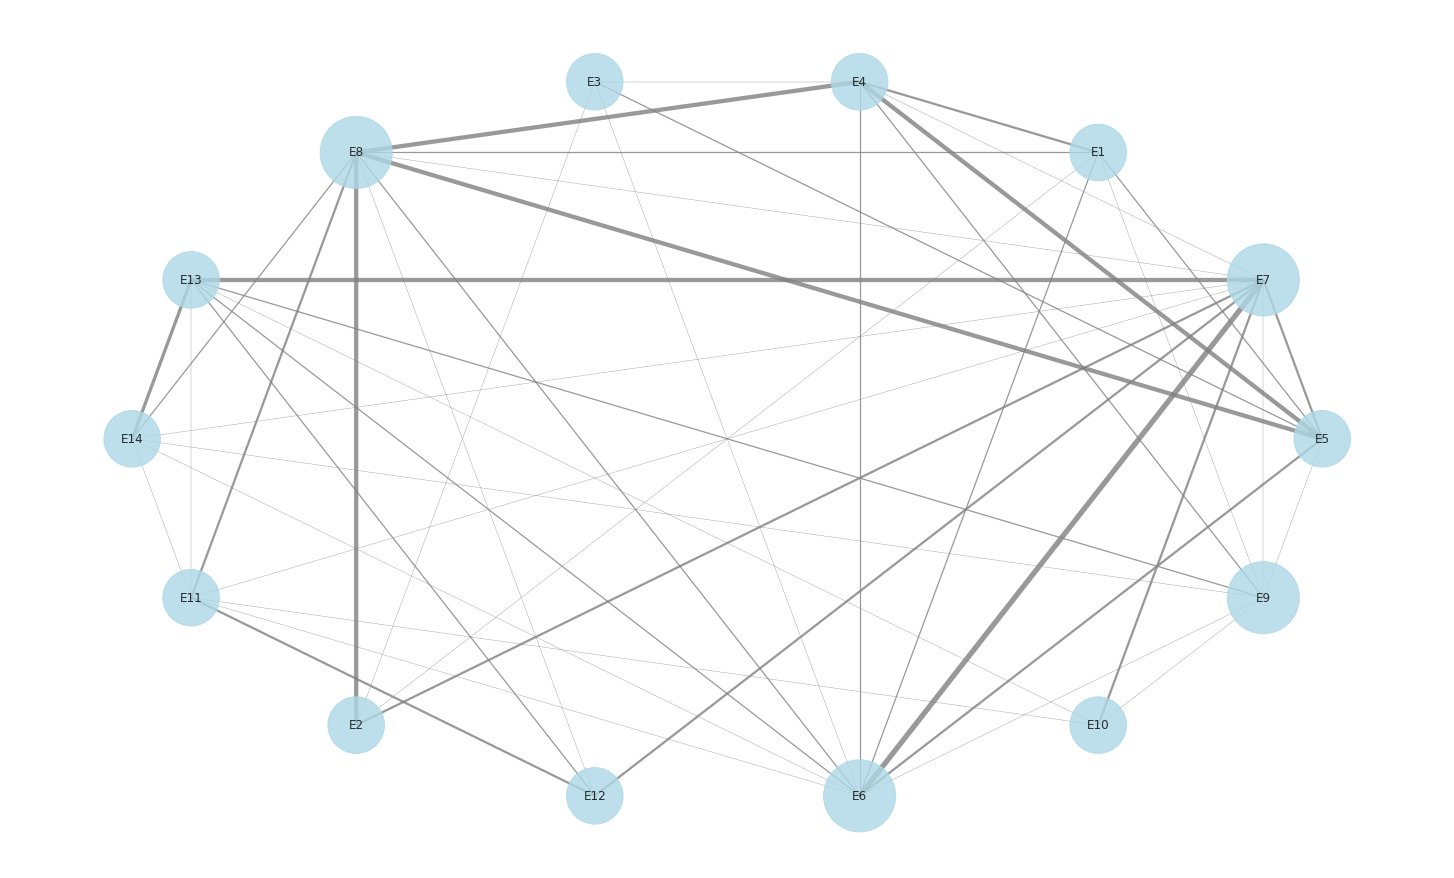

In [27]:
seed=456
degs = [v*400 for v in list(dict(C.degree()).values())]
edge_weights = [d['weight'] for n, e, d in W.edges(data=True)]
plt.figure(figsize=[20,12])
nx.draw_circular(C, width=np.log(edge_weights)**2.5, edge_color='grey', with_labels=True, node_size= degs, node_color='lightblue', alpha=0.8);

We can see that amongst some of the less influential nodes there are some pretty strong relationships, particularly between E10-E14, E12-E14, and there are some clear triads (E10/E12/E14). Also interesting is that E8, the most influential node, has very strong connections with two of the least influential nodes, E1 and E13. 

## Summary: Women

In [28]:
graph_summary(W)

,node,degree,weight,closeness_centrality,degree_centrality,betweenness_centrality,eigenvector_centrality
0,Theresa Anderson,17,57,1.000000,1.000000,0.010122,0.253524
1,Nora Fayette,17,43,1.000000,1.000000,0.010122,0.253524
2,Helen Lloyd,17,34,1.000000,1.000000,0.010122,0.253524
3,Sylvia Avondale,17,46,1.000000,1.000000,0.010122,0.253524
4,Ruth DeSand,17,40,1.000000,1.000000,0.010122,0.253524
5,Evelyn Jefferson,17,50,1.000000,1.000000,0.010122,0.253524
6,Verne Sanderson,17,38,1.000000,1.000000,0.010122,0.253524
7,Myra Liddel,16,33,0.944444,0.941176,0.005348,0.243157
8,Dorothy Murchison,16,24,0.944444,0.941176,0.005348,0.243157
9,Pearl Oglethorpe,16,31,0.944444,0.941176,0.005348,0.243157


## Summary: Clubs

In [29]:
graph_summary(C)

,node,degree,weight,closeness_centrality,degree_centrality,betweenness_centrality,eigenvector_centrality
0,E7,13,48,1.000000,1.000000,0.080128,0.339336
1,E8,13,59,1.000000,1.000000,0.080128,0.339336
2,E6,13,41,1.000000,1.000000,0.080128,0.339336
3,E9,13,46,1.000000,1.000000,0.080128,0.339336
4,E5,8,38,0.722222,0.615385,0.000000,0.232251
5,E1,8,19,0.722222,0.615385,0.000000,0.232251
6,E4,8,23,0.722222,0.615385,0.000000,0.232251
7,E3,8,32,0.722222,0.615385,0.000000,0.232251
8,E13,8,18,0.722222,0.615385,0.000000,0.232251
9,E14,8,18,0.722222,0.615385,0.000000,0.232251


## Inferences

### Women

The women consist of mainly two groups and 7 cliques. Brenda Rogers and Theresa Anderson are the most connected of the women, and Brenda Rogers and Katherina Rogers have the strongest relationships with the clubs, Brenda Rogers with E4 and E5, and Katharina Rogers with E8 and E9. 

### Clubs  

Interestingly, there are only 4 clubs with any betweenness centrality. This makes sense, because we observed many open triads between the groups. One of the things that this could suggest is that we could make suggestions to members about clubs they might like based on these open triads. 